# SCAG High Injury Network

I will be using the SCAG High Injury Network (HIN) as the basis for the Week 2 data exploration assignment. The data was downloaded as a GeoJSON file and contains the HIN segements within Southern California. The HIN identifies stretches of roadways where the highest concentrations of collisions resulting in fatal or serious injuries occur on the transportation network.

In [3]:
import pandas as pd
import geopandas as gpd

Importing a new module 'geopandas', a geospatial library, to be able to import spatial data formats and plot them on a map. 

In [4]:
scag = gpd.read_file('High_Injury_Network_SCAG.geojson')

In [5]:
type(scag)

geopandas.geodataframe.GeoDataFrame

Reading and adding GeoJSON

## Data Exploration

In [6]:
scag.head()

,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR,geometry
0,1,10008,E Adams Ave,Orange,Orange,0.499465,0.0,0.5,0.5,No,Yes,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.83806 33.80665, -117.83..."
1,2,10140_0,E Balboa Blvd,Newport Beach,Orange,1.002174,0.0,2.5,2.5,No,Yes,No,Yes,No,No,2022,"MULTILINESTRING ((-117.89062 33.59901, -117.88..."
2,3,10140_1,E Balboa Blvd,Newport Beach,Orange,0.543847,0.0,1.0,1.0,Yes,No,No,Yes,No,No,2022,"MULTILINESTRING ((-117.90284 33.6031, -117.902..."
3,4,10145_1,E Ball Rd,Anaheim,Orange,1.098312,0.0,3.0,3.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.88851 33.8181, -117.888..."
4,5,10145_2,E Ball Rd,Anaheim,Orange,0.755181,0.0,1.0,1.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.89739 33.81809, -117.89..."


Checking the GeoJSON data using the  'head()' command which provides the first 5 rows of the dataframe. The dataframe shows segements of the HIN and provides city, county, length, collisions, and year data information. Based on the table, the dataframe includes various types of HIN for auto, pedestrian, bike, and all collision types. 

In [7]:
scag.shape

(5964, 17)

Utilizing the 'shape' command to determine how many rows and files are in the data. This particlar dataframe contains 5,963 rows and 17 columns. 

In [8]:
scag.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              5964 non-null   int32   
 1   SEGMENT_ID            5964 non-null   object  
 2   SEGMENT_NAME          5964 non-null   object  
 3   CITY                  5964 non-null   object  
 4   COUNTY                5964 non-null   object  
 5   MILE                  5964 non-null   float64 
 6   FATALITY_VICTIM       5964 non-null   float64 
 7   SEVERE_INJURY_VICTIM  5964 non-null   float64 
 8   VICTIM_COUNT          5964 non-null   float64 
 9   HIN_AUTO              5964 non-null   object  
 10  HIN_PED               5964 non-null   object  
 11  HIN_BIKE              5964 non-null   object  
 12  HIN_ALL               5964 non-null   object  
 13  TRANSIT_AREA          5964 non-null   object  
 14  EQUITY_AREA           5964 non-null   object  
 

Utilizing the 'info()' command to learn more about the data's information. This dataframe includes a mix of integer, objects, float, and geometry types. I would expect the main columns I would use for my analysis would be those pertaining to segement, mile, HIN, and year data. 

<Axes: >

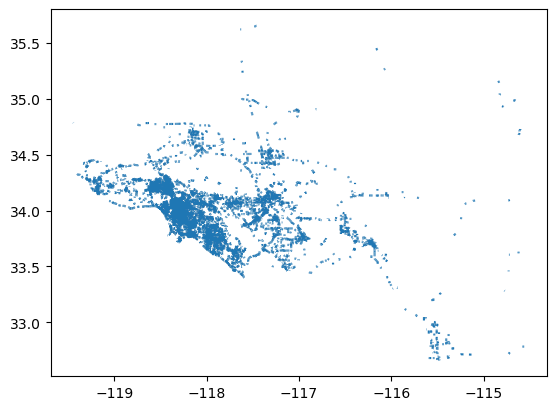

In [9]:
scag.plot()

The plot shows all the HIN segements in Southern California as defined by SCAG. The 'plot() function utilizes the geometry column from the dataframe. 

In [10]:
scag['CITY'].value_counts()

CITY
Los Angeles         1490
Unincorporated      1060
Long Beach           172
Riverside             94
Santa Ana             91
                    ... 
Lomita                 1
Hidden Hills           1
Westlake Village       1
South Pasadena         1
La Habra Heights       1
Name: count, Length: 183, dtype: int64

Utilized the 'value_counts()' command to see how many HIN segements are in different cities in Southern California. 

In [11]:
scag[scag.CITY == 'Glendora']

,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR,geometry
2427,2428,23433_0,E Gladstone St,Glendora,Los_Angeles,1.019243,0.0,2.5,2.5,Yes,No,No,Yes,No,No,2022,"MULTILINESTRING ((-117.84196 34.11392, -117.84..."
2443,2444,23739_1,E Juanita Ave,Glendora,Los_Angeles,0.499770,0.5,0.0,0.5,No,No,Yes,Yes,No,No,2022,"MULTILINESTRING ((-117.86115 34.1103, -117.859..."
2881,2882,36866,Kenoma St,Glendora,Los_Angeles,0.309920,0.0,0.5,0.5,No,Yes,No,Yes,No,No,2022,"MULTILINESTRING ((-117.82509 34.12526, -117.82..."
3148,3149,46168,N Barranca Ave,Glendora,Los_Angeles,0.751249,0.0,1.5,1.5,Yes,No,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.88131 34.14147, -117.88..."
3321,3322,48453_0,N Valley Center Ave,Glendora,Los_Angeles,1.092823,0.0,4.0,4.0,Yes,No,Yes,Yes,No,No,2022,"MULTILINESTRING ((-117.83764 34.10711, -117.83..."
3795,3796,58870_1,S Glendora Ave,Glendora,Los_Angeles,1.009254,0.0,1.5,1.5,No,No,Yes,Yes,No,Yes,2022,"MULTILINESTRING ((-117.86381 34.10818, -117.86..."
3975,3976,60296,S Sunflower Ave,Glendora,Los_Angeles,0.799170,1.5,2.0,3.5,Yes,No,Yes,Yes,No,Yes,2022,"MULTILINESTRING ((-117.84639 34.10721, -117.84..."
4085,4086,6151,Auto Centre Dr,Glendora,Los_Angeles,0.872741,0.0,1.5,1.5,Yes,No,No,Yes,No,No,2022,"MULTILINESTRING ((-117.82292 34.11756, -117.82..."
4312,4313,67594,Underhill Dr,Glendora,Los_Angeles,0.417349,1.0,0.0,1.0,No,Yes,No,Yes,No,No,2022,"MULTILINESTRING ((-117.8401 34.13662, -117.840..."
4384,4385,68374,Verdugo Ave,Glendora,Los_Angeles,0.475890,0.0,1.0,1.0,No,Yes,No,Yes,No,No,2022,"MULTILINESTRING ((-117.83062 34.13665, -117.83..."


Queried the data to identify the HIN segements within the City of Glendora. This is one of the two cities we are researching for our team project.

In [15]:
scag.query("CITY == 'Azusa'")

,OBJECTID,SEGMENT_ID,SEGMENT_NAME,CITY,COUNTY,MILE,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR,geometry
2302,2303,21506_1,E Alosta Ave,Azusa,Los_Angeles,1.044193,0.0,2.5,2.5,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.89274 34.1296, -117.892..."
2314,2315,21564_1,E Arrow Hwy,Azusa,Los_Angeles,1.008322,1.0,7.0,8.0,Yes,Yes,Yes,Yes,No,Yes,2022,"MULTILINESTRING ((-117.89789 34.10677, -117.89..."
2359,2360,22572_0,E Baseline Rd,Azusa,Los_Angeles,1.001354,0.0,1.5,1.5,Yes,No,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.89315 34.1215, -117.893..."
2415,2416,23365_1,E Foothill Blvd,Azusa,Los_Angeles,0.563640,0.0,1.5,1.5,No,Yes,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.90332 34.13357, -117.90..."
2426,2427,23430_1,E Gladstone St,Azusa,Los_Angeles,0.557984,0.0,3.0,3.0,Yes,Yes,Yes,Yes,No,Yes,2022,"MULTILINESTRING ((-117.8837 34.11405, -117.883..."
2430,2431,23635,E Hollyvale St,Azusa,Los_Angeles,0.253820,0.0,0.5,0.5,Yes,No,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.8815 34.12706, -117.881..."
3131,3132,45942,N Alameda Ave,Azusa,Los_Angeles,0.986478,0.0,2.0,2.0,No,No,Yes,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.90631 34.12442, -117.90..."
3168,3169,46434,N Cerritos Ave,Azusa,Los_Angeles,0.459056,0.0,1.0,1.0,No,Yes,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.89918 34.11419, -117.89..."
3292,3293,48170_0,N San Gabriel Ave,Azusa,Los_Angeles,1.059905,0.0,4.0,4.0,Yes,No,No,Yes,Yes,Yes,2022,"MULTILINESTRING ((-117.90893 34.12346, -117.90..."
3296,3297,48174_2,N San Gabriel Canyon Rd,Azusa,Los_Angeles,0.970640,0.0,3.0,3.0,Yes,No,No,Yes,No,Yes,2022,"MULTILINESTRING ((-117.91013 34.1512, -117.910..."


Queried the data using a different command to filter HIN data for the City of Azusa which is the other city we are researching for our team project. Based on the output for both cities, the City of Azusa has more HIN segments than the City of Glendora. 